In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
img = cv2.imread("../assets/imori.jpg")

In [12]:
# Get image size (W, H)
size = tuple([img.shape[1], img.shape[0]])
# Get image center (x, y)
center = tuple([int(size[0]/2), int(size[1]/2)])
# Change angle
angle = 180.0
# Large scale
scale = 1.0
# Calculation Rot_matrix
rot_matrix = cv2.getRotationMatrix2D(center, angle, scale)
# Affine transportation
rot_img = cv2.warpAffine(img, rot_matrix, size, flags=cv2.INTER_CUBIC)
# ORB 
detector = cv2.ORB_create()

In [13]:
# Get feature
kp1, des1 = detector.detectAndCompute(img, None)
kp2, des2 = detector.detectAndCompute(rot_img, None)

In [14]:
# Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

In [15]:
# Write matching
match_img = cv2.drawMatches(img, kp1, rot_img, kp2, matches[:20], None, flags=2)

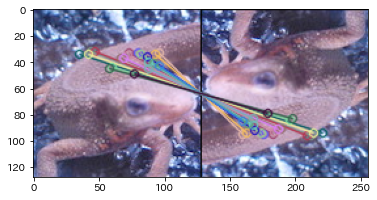

In [16]:
plt.imshow(match_img[:,:,::-1])